Atividades
===

Essas atividade são relativas a aulas de Machine Learning.

> Lembre de criar uma `virtualenv` com os `requirements.txt` do repositório.

> Lembre de criar uma `kernel` do jupyter para seus desenvolvimentos

> Enviei apenas o seu notebook para correção. Não é necessário enviar nenhum outro arquivo. Siga o padrão `Atividades-<NOME-DO-ALUNO>.ipynb`

# Machine Learning

## 1. Classificação com *hold-out*.

## Imports

In [1]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
import time
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import cv2
import os
import glob
import csv
from skimage import feature


## Carregue a base

In [2]:
#carregue a base
def load_base():
    #vou atribuir a leitura do meu csv à variável data
    data = pd.read_csv("diabetes.csv")
    X = data.iloc[:, :-1].values  
    z = data.iloc[:, 8].values
    lab = LabelEncoder()
    z[:] = lab.fit_transform(z[:])
    y = z.astype('int') 
    
    return X,y
    
    

a) Utilize o método hold-out para dividir a base de dados [diabetes.csv](https://github.com/lapisco/machine_learning_course/blob/master/data/diabetes.csv) em treino e teste (50 iterações).

**help**: [factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html) (converte o rótulo da classe para 0 e 1) e [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) (divisão balanceada dos dados).

In [3]:
# hold-out. o n_splits são as 50 divisões e vai 0.25 para teste
hold_out_div = StratifiedShuffleSplit(n_splits=50, test_size=0.25) 

b) Use os classificadores MLP e QDA dentro do método hold-out do item anterior.

**help**: [Taxa de acerto do kNN com base Iris](https://github.com/lapisco/machine_learning_course/blob/master/ml.ipynb) (exemplo do kNN com hold-out), [QuadraticDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html) e [Multilayer Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [4]:
X, y = load_base()

temptes_qda =[]
acu_qda = []
sens_qda = []
f1s_qda = []

temptes_mlp = []
acu_mlp = []
sens_mlp = []
f1s_mlp = []

cont = 0

# dentro da base dividida por hold out
for train_index, test_index in hold_out_div.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    #Encontrar os elementos exclusivos de uma matriz atrafvés do unique.

    indexs, c = np.unique(y_test, return_counts=True)
    print('\nQuantidade de amostras por classe: {} {}'.format(c, np.sum(c)))
    
    # qda e o treino
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    qda.fit(X, y)
    
    ti_qda = time.time()
    qda_predicted = qda.predict(X_test)
    tf_qda = time.time()
    
    #QDA 
    acu_q = accuracy_score(y_test, qda_predicted)
    sens_q = recall_score(y_test, qda_predicted)
    f1s_q = f1_score(y_test, qda_predicted)
    
    acu_qda.append(acu_q)
    sens_qda.append(sens_q)
    f1s_qda.append(f1s_q)
    temptes_qda.append((tf_qda - ti_qda))
    
    #mlp e o treino
    mlp = MLPClassifier(solver='adam', learning_rate='adaptive', hidden_layer_sizes = (100,), 
                        max_iter=9000, learning_rate_init=5e-04, tol=1e-4)

    mlp.fit(X, y)
    
    ti_mlp = time.time()
    mlp_predicted = mlp.predict(X_test)
    tf_mlp = time.time()
    
    
    #MLP
    acu_m = accuracy_score(y_test, mlp_predicted)
    sens_m = recall_score(y_test, mlp_predicted)
    f1s_m = f1_score(y_test, mlp_predicted)
    
    acu_mlp.append(acu_m)
    sens_mlp.append(sens_m)
    f1s_mlp.append(f1s_m)
    temptes_mlp.append((tf_mlp - ti_mlp))
    
    cont+=1


Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192

Quantidade de amostras por classe: [125  67] 192


# c) Calcule a média e o desvio padrão das métricas a seguir para os classificadores do item anterior:
- acurácia
- sensibilidade (recall)
- f1_score
- tempo de teste    

**help**: use as funções do [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html), [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html). Dica de leitura https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/


In [5]:
# Calcule a média e o desvio padrão das métricas a seguir para os classificadores do item anterior:

# começar com o qda

# média acurácia
acu_qda_mean = sum(acu_qda)/cont
# média sensibilidade (recall)
sens_qda_mean = sum(sens_qda)/cont
#média f1_score
f1s_qda_mean = sum(f1s_qda)/cont
# média tempo de teste
temptes_qda_mean = sum(temptes_qda)/cont

# visualizações - saída (na ordem) - média

print ('---- QDA ---- \n')

print ('Média Acurácia: ', acu_qda_mean)
print ('Média Sensibilidade (recall): ', sens_qda_mean)
print ('Média f1_score: ', f1s_qda_mean)
print ('Média Tempo de Teste: ', temptes_qda_mean)

# desvio padrão acurácia
acu_qda_std = np.std(acu_qda)
# desvio padrão sensibilidade (recall)
sens_qda_std = np.std(sens_qda)
# desvio padrão f1_score
f1s_qda_std = np.std(f1s_qda)
# desvio padrão tempo de teste
temptes_qda_std = np.std(temptes_qda)

# visualizações - saída (na ordem) - desvio padrão

print ('\nDesvio Padrão Acurácia: ', acu_qda_std)
print ('Desvio Padrão Sensibilidade (recall): ', sens_qda_std)
print ('Desvio Padrão f1_score: ', f1s_qda_std)
print ('Desvio Padrão Tempo de Teste: ', temptes_qda_std)








---- QDA ---- 

Média Acurácia:  0.7658333333333333
Média Sensibilidade (recall):  0.5749253731343282
Média f1_score:  0.6308777534244064
Média Tempo de Teste:  0.0005296134948730469

Desvio Padrão Acurácia:  0.026103260492385493
Desvio Padrão Sensibilidade (recall):  0.05146462579024554
Desvio Padrão f1_score:  0.04417342076790072
Desvio Padrão Tempo de Teste:  7.030478005033427e-05


In [6]:
# Calcule a média e o desvio padrão das métricas a seguir para os classificadores do item anterior:

# mlp

#média acurácia
acu_mlp_mean = sum(acu_mlp)/cont
# média sensibilidade (recall)
sens_mlp_mean = sum(sens_mlp)/cont
# média f1_score
f1s_mlp_mean = sum(f1s_mlp)/cont
# média tempo de teste
temptes_mlp_mean = sum(temptes_mlp)/cont

# visualizações - saída (na ordem) - média

print ('---- MLP ---- \n')
print ('Média Acurácia: ', acu_mlp_mean)
print ('Média Sensibilidade (recall): ', sens_mlp_mean)
print ('Média f1_score: ', f1s_mlp_mean)
print ('Média Tempo de teste: ', temptes_mlp_mean)


# desvio padrão acurácia
acu_mlp_std = np.std(acu_mlp)
# desvio padrão sensibilidade (recall)
sens_mlp_std = np.std(sens_mlp)
# desvio padrão f1_score
f1s_mlp_std = np.std(f1s_mlp)
# desvio padrão tempo de teste
temptes_mlp_std = np.std(temptes_mlp)

# visualizações - saída (na ordem) - desvio padrão

print ('\nDesvio Padrão Acurácia: ', acu_mlp_std)
print ('Desvio Padrão Sensibilidade (recall): ', sens_mlp_std)
print ('Desvio Padrão f1_score: ', f1s_mlp_std)
print ('Desvio Padrão Tempo de Teste: ', temptes_mlp_std)



---- MLP ---- 

Média Acurácia:  0.7534375000000001
Média Sensibilidade (recall):  0.5668656716417912
Média f1_score:  0.6127019670726999
Média Tempo de teste:  0.0008170938491821289

Desvio Padrão Acurácia:  0.02776798872652945
Desvio Padrão Sensibilidade (recall):  0.09081154368756837
Desvio Padrão f1_score:  0.05973201695107152
Desvio Padrão Tempo de Teste:  0.0003830513442524687


## 2. Gráfico de superfície de decisão

- Plote a superfície de decisão de todas as combinações de atributos para o SVM com kernel Linear e RBF usando a base de dados da Iris. Escolha os hiperparâmetros usando o RandomizedSearchCV.

**help**: [decision_surface_mlp()](https://github.com/lapisco/machine_learning_course/blob/master/ml.ipynb) (exemplo da superfície de decisão com MLP), [Random Search](https://github.com/lapisco/machine_learning_course/blob/master/ml.ipynb) (exemplo do RandomizedSearchCV)

----------setosa com others----------


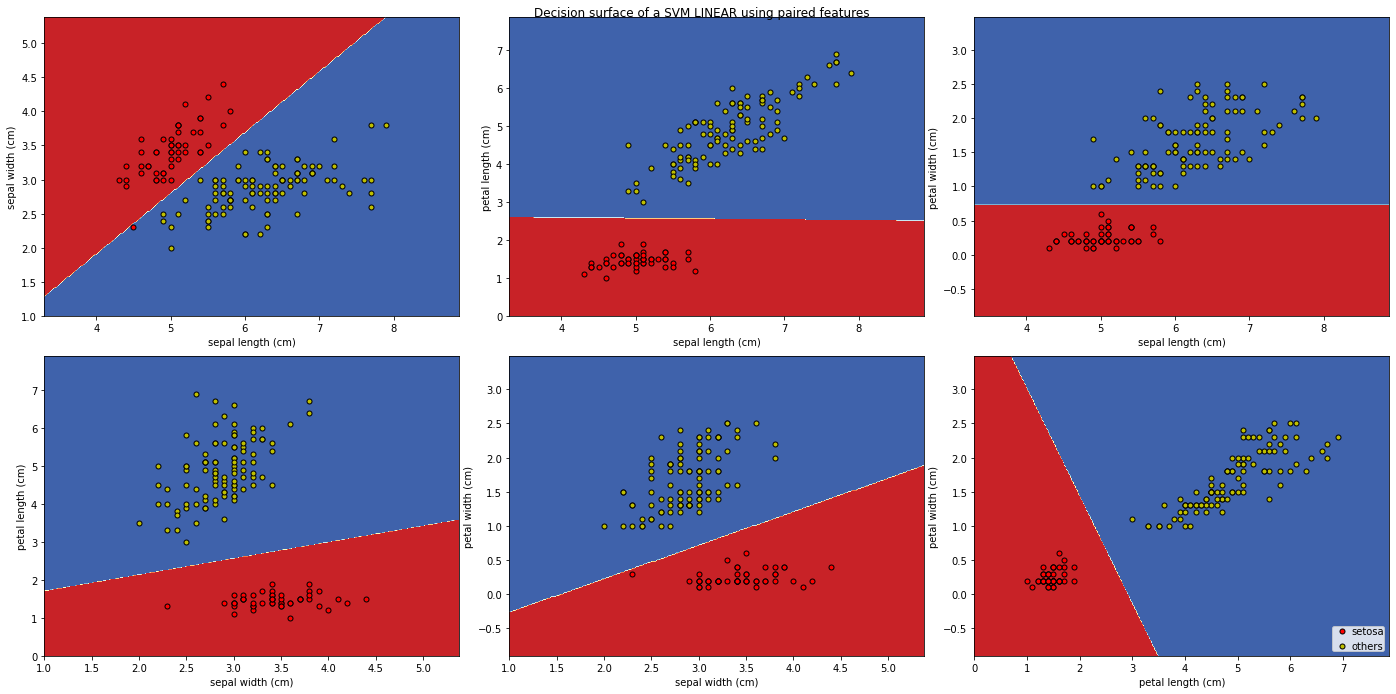

----------versicolour com others----------


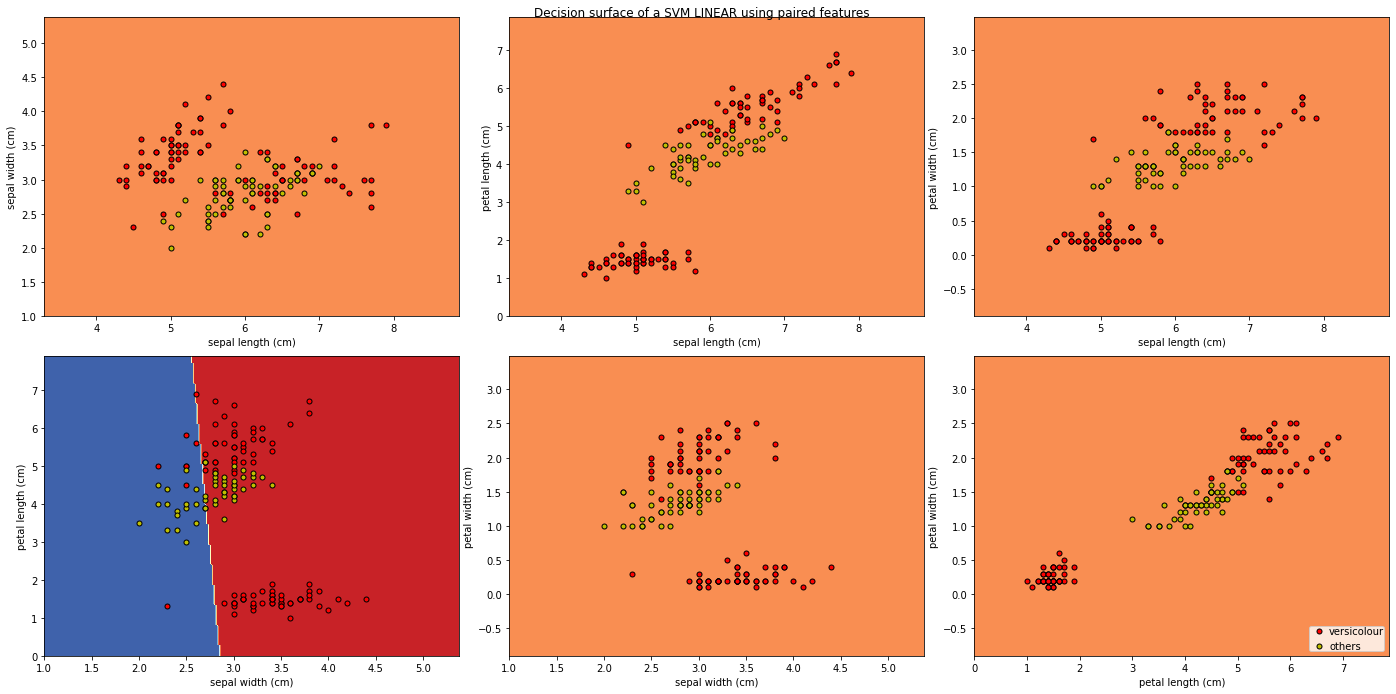

----------virginica com others----------


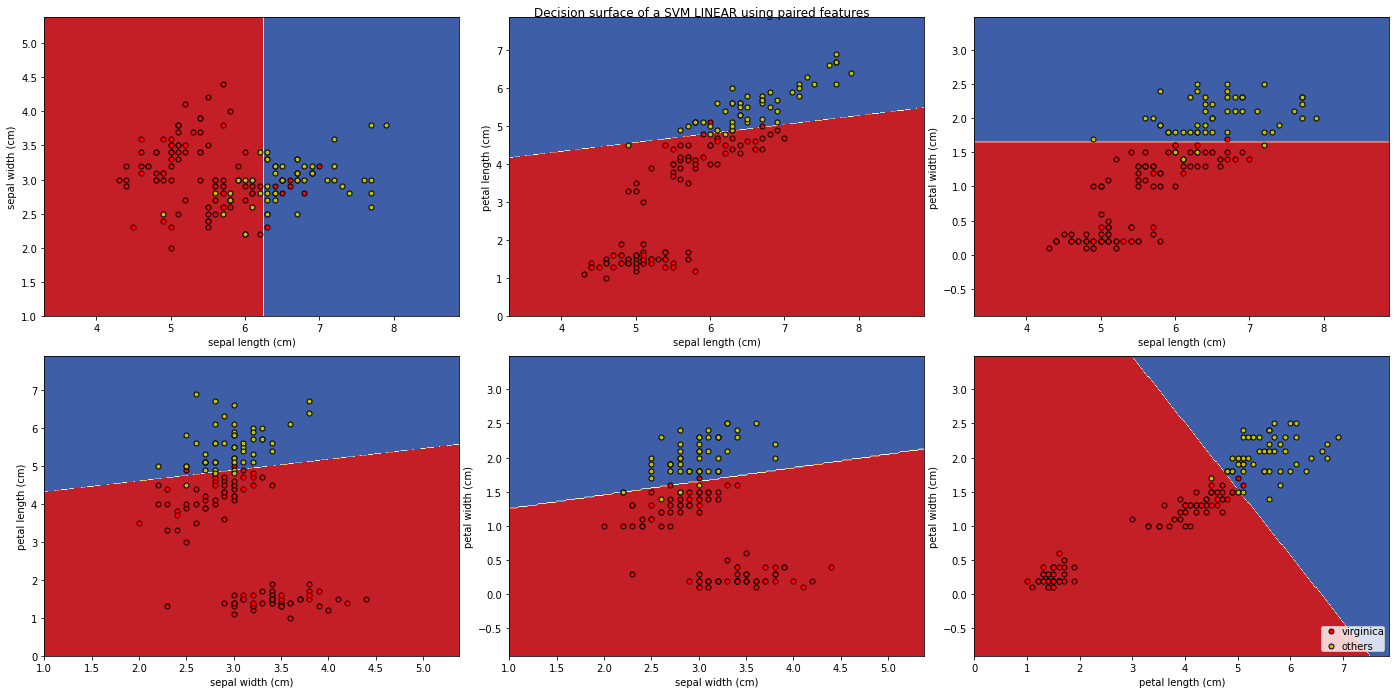

In [7]:
# SVM com kernel Linear 

def decision_surface(n_classes):
    for i in range(3):
        plot_colors = "ryb"
        plot_step = 0.02
        tipo = i
        # Load data
        iris = load_iris()

        target_names = iris.target_names
    
        if n_classes == 2:
            if tipo == 0:             
                target_names = ['setosa', 'others']
            if tipo == 1:
                target_names = ['versicolour', 'others']
            if tipo == 2:
                target_names = ['virginica', 'others']
        
        for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
            X = iris.data[:, pair]
            y = iris.target
            if n_classes == 2:
                if tipo == 0:
                    y[y == 2] = 1
                if tipo ==1:
                    y[y == 2] = 0
                if tipo == 2:
                    y[y ==0] = 1
        # Train
            svm_linear = SVC(kernel = 'linear')
            svm_rbf_clf = SVC(kernel = 'rbf')

            classifiers = {'SVM-LINEAR': svm_linear, 'SVM-RBF': svm_rbf_clf}

        # Define param range for searching:
            param_dist_dict = {'SVM-LINEAR': {'gamma': [2**i for i in range(-5,5)], 'C': [2**i for i in range(-5,5)]},
                   'SVM-RBF': {'gamma': [2**i for i in range(-5,5)], 'C': [2**i for i in range(-5,5)]}}


            random_search = dict((k,[]) for k in classifiers.keys())

            for clf in param_dist_dict.keys():
                random_search[clf] = RandomizedSearchCV(classifiers[clf], param_dist_dict[clf], cv=3, n_iter=5, 
                                            verbose=0, scoring='accuracy')
                random_search[clf].fit(X, y)
            
            clf_linear = random_search['SVM-LINEAR'].best_estimator_
            clf_rbf = random_search['SVM-RBF'].best_estimator_
            
        # Plot the decision boundary
            plt.figure(1, figsize=(20,10))
            plt.subplot(2, 3, pairidx + 1)

            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
            plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

            Z = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

            plt.xlabel(iris.feature_names[pair[0]])
            plt.ylabel(iris.feature_names[pair[1]])

        # Plot the training points
            for i, color in zip(range(n_classes), plot_colors):
                if(tipo == 2):
                    idx = np.where(y == i+1)
                    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=25)
                else:
                    idx = np.where(y == i)
                    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=25)
        print("----------"+ target_names[0] + " com "+ target_names[1] +"----------")

        plt.suptitle("Decision surface of a SVM LINEAR using paired features")
        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
        plt.axis("tight")
        plt.show()

if __name__ == '__main__':

    decision_surface(2)



----------setosa com others----------


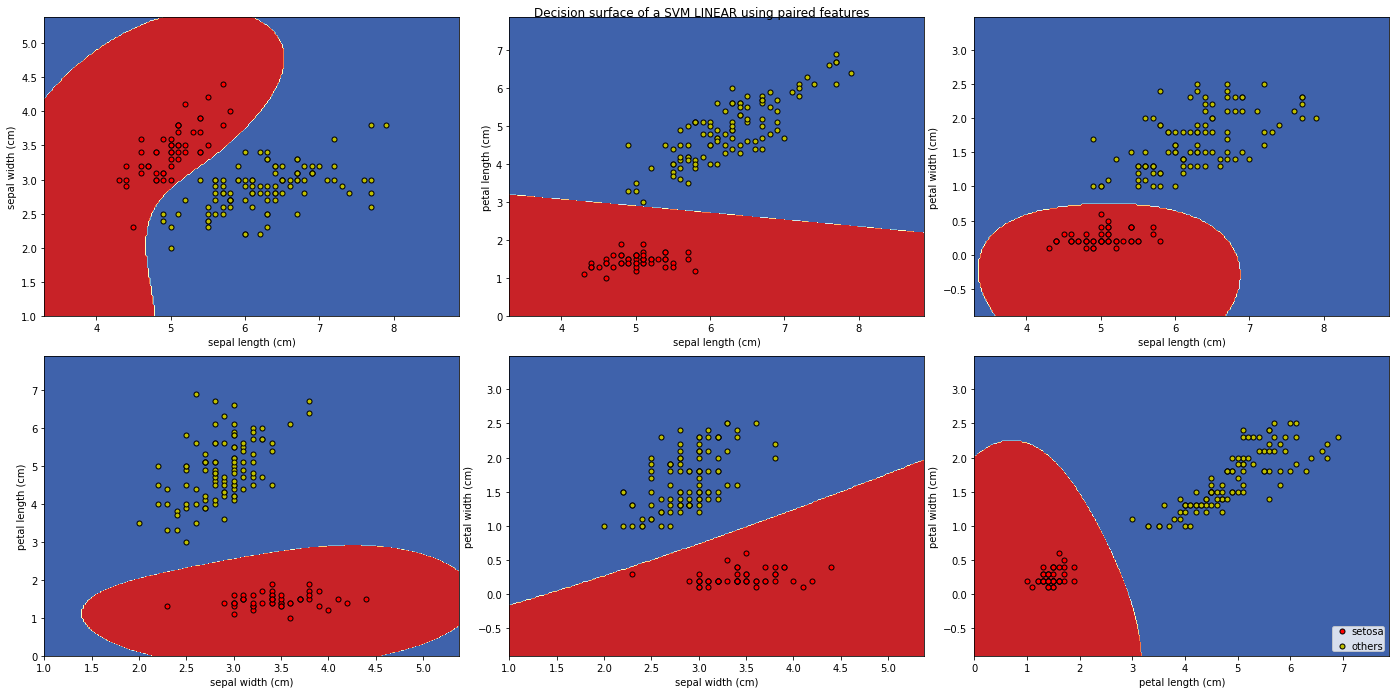

----------versicolour com others----------


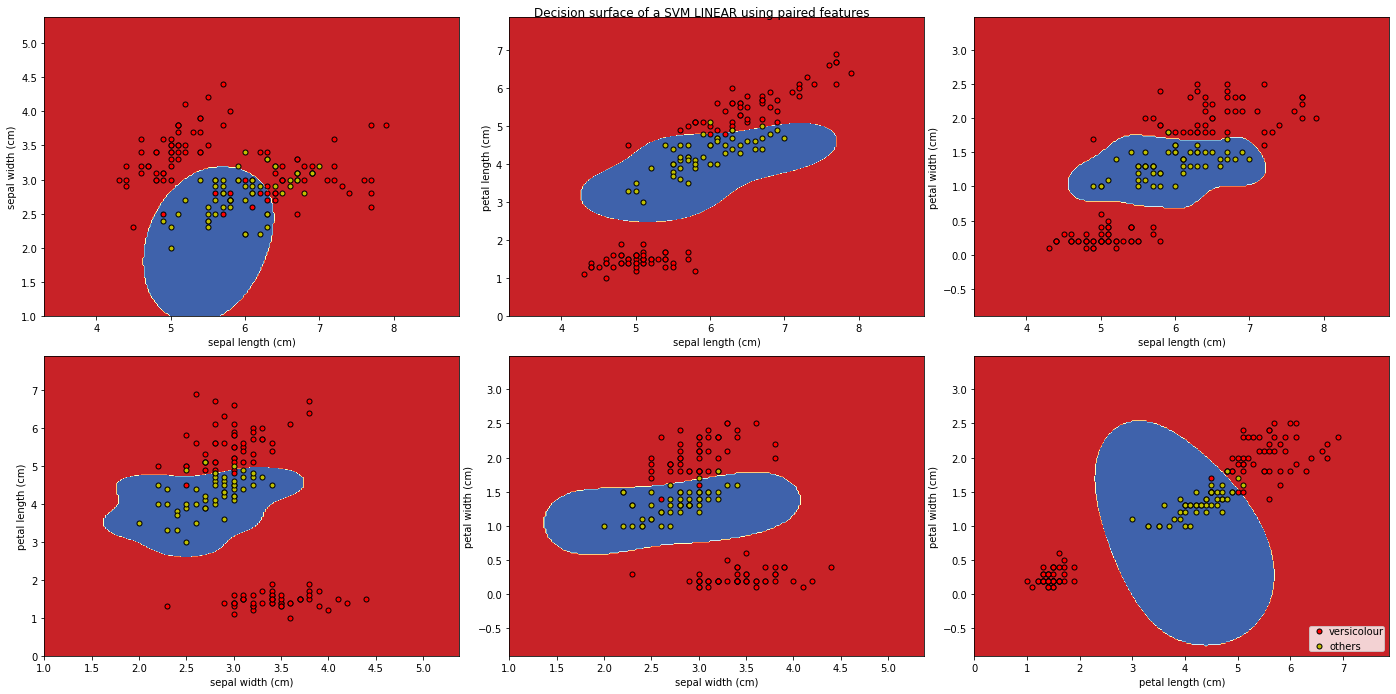

----------virginica com others----------


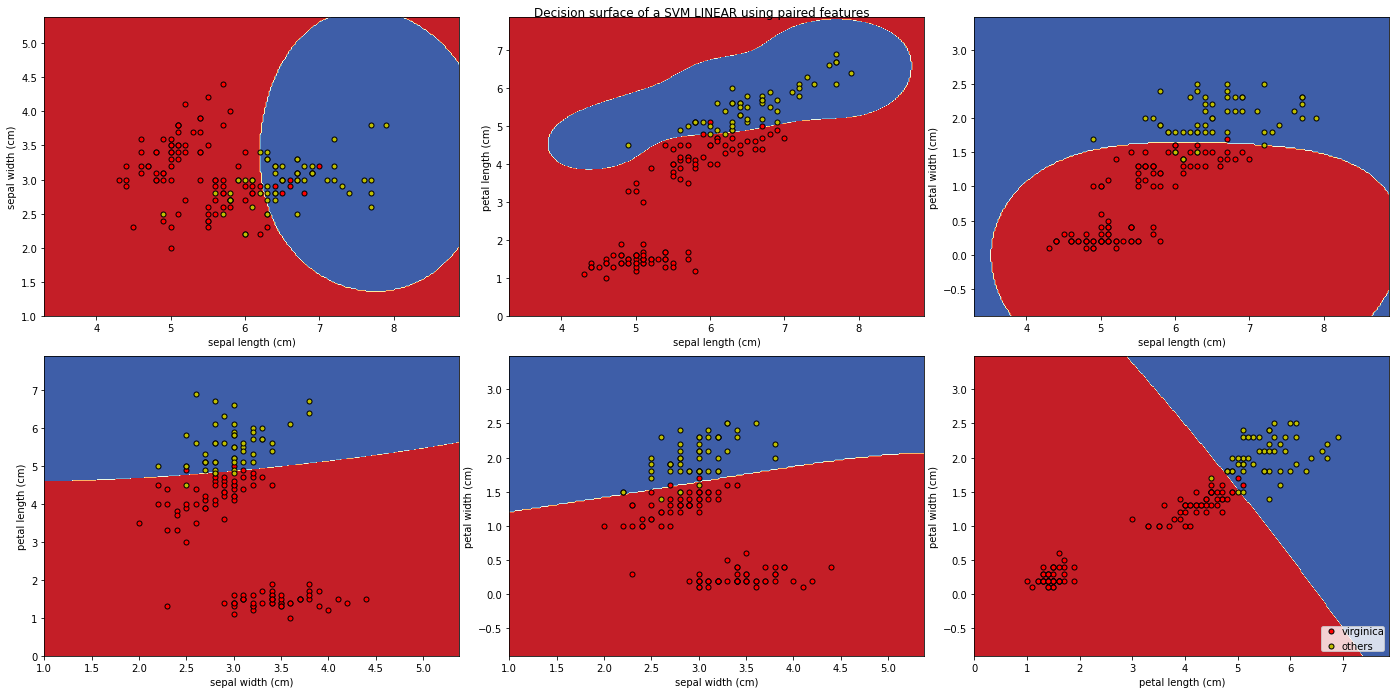

In [8]:
#  svm rbf

def decision_surface(n_classes):
    for i in range(3):
        plot_colors = "ryb"
        plot_step = 0.02
        tipo = i
        # Load data
        iris = load_iris()

        target_names = iris.target_names
    
        if n_classes == 2:
            if tipo == 0:             
                target_names = ['setosa', 'others']
            if tipo == 1:
                target_names = ['versicolour', 'others']
            if tipo == 2:
                target_names = ['virginica', 'others']
        
        for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
            X = iris.data[:, pair]
            y = iris.target
            if n_classes == 2:
                if tipo == 0:
                    y[y == 2] = 1
                if tipo ==1:
                    y[y == 2] = 0
                if tipo == 2:
                    y[y ==0] = 1
        # Train
            svm_linear = SVC(kernel = 'linear')
            svm_rbf_clf = SVC(kernel = 'rbf')

            classifiers = {'SVM-LINEAR': svm_linear, 'SVM-RBF': svm_rbf_clf}

        # Define param range for searching:
            param_dist_dict = {'SVM-LINEAR': {'gamma': [2**i for i in range(-5,5)], 'C': [2**i for i in range(-5,5)]},
                   'SVM-RBF': {'gamma': [2**i for i in range(-5,5)], 'C': [2**i for i in range(-5,5)]}}


            random_search = dict((k,[]) for k in classifiers.keys())

            for clf in param_dist_dict.keys():
                random_search[clf] = RandomizedSearchCV(classifiers[clf], param_dist_dict[clf], cv=3, n_iter=5, 
                                            verbose=0, scoring='accuracy')
                random_search[clf].fit(X, y)
            
            clf_linear = random_search['SVM-LINEAR'].best_estimator_
            clf_rbf = random_search['SVM-RBF'].best_estimator_
            
        # Plot the decision boundary
            plt.figure(1, figsize=(20,10))
            plt.subplot(2, 3, pairidx + 1)

            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
            plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

            Z = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

            plt.xlabel(iris.feature_names[pair[0]])
            plt.ylabel(iris.feature_names[pair[1]])

        # Plot the training points
            for i, color in zip(range(n_classes), plot_colors):
                if(tipo == 2):
                    idx = np.where(y == i+1)
                    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=25)
                else:
                    idx = np.where(y == i)
                    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=target_names[i],
                        cmap=plt.cm.RdYlBu, edgecolor='black', s=25)
        print("----------"+ target_names[0] + " com "+ target_names[1] +"----------")

        plt.suptitle("Decision surface of a SVM LINEAR using paired features")
        plt.legend(loc='lower right', borderpad=0, handletextpad=0)
        plt.axis("tight")
        plt.show()

if __name__ == '__main__':

    decision_surface(2)

## 3. Extração de atributos e classificação

a) Crie uma base de dados utilizando algum dos extratores de características visto no módulo 2 (LBP, HU ou GLCM) com as imagens do link a seguir. Cada imagem representará uma amostra e seus atributos serão obtidos pelo extrator escolhido. Use o nome do arquivo para saber a classe. Por exemplo, ``P01_01.JPG`` será a 1&deg; amostra e sua classe será a 1, enquanto a imagem ``P02_02.JPG`` será a 42&deg; amostra e sua classe será a 2. Ao final, sua base de dados deve ser composta por 600 amostras com 15 classes (40 amostras por classe). \
[Imagens](https://www.dropbox.com/sh/fwp8l3jt1hbd5ya/AAByxHuzLK_EFLawWieR1eUHa?dl=0) \
[Site com a descrição](https://lapisco.ifce.edu.br/producao-academica/private-datasets/image-database-of-virtual-and-real-environment-for-mobile-robot-localization-from-gopro/)

In [10]:
# code here

def extract_hu(images):
    print('[INFO] Extracting HU.')
    hu_features = []

    for i, image in enumerate(images):

        print('[INFO] Extracting features of image {}/{}'.format(i + 1, len(images)))

        # Load the rgb image
        imcolor = cv2.imread(image)

        # Convert to grayscale
        imcinza = cv2.cvtColor(imcolor, cv2.COLOR_BGR2GRAY)

        # Extract lbp
        hu = cv2.moments(imcinza)
        #feature.greycomatrix(file, distances, angles, 256, symmetric=False, normed=True)

        # Create a list with the features of GLCM
        
        hu_features.append(np.asarray(cv2.HuMoments(hu).flatten()))
        
        #glcm_properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
        #features = [feature.greycoprops(glcm, glcm_property)[0, 0] for glcm_property in glcm_properties]

        #glcm_features.append(features)

    print('\n')

    return hu_features

def save_results(extractor_name, features):

    for vector in features:
        print(vector)

    with open(extractor_name + '.csv', 'w') as outfile:
        writer = csv.writer(outfile)
        writer.writerows(features)

In [11]:
dataset = 'robo'

image_paths = glob.glob(os.path.join(dataset, '*.JPG'))

features = extract_hu(image_paths)

save_results('HU', features)

[INFO] Extracting HU.
[INFO] Extracting features of image 1/600
[INFO] Extracting features of image 2/600
[INFO] Extracting features of image 3/600
[INFO] Extracting features of image 4/600
[INFO] Extracting features of image 5/600
[INFO] Extracting features of image 6/600
[INFO] Extracting features of image 7/600
[INFO] Extracting features of image 8/600
[INFO] Extracting features of image 9/600
[INFO] Extracting features of image 10/600
[INFO] Extracting features of image 11/600
[INFO] Extracting features of image 12/600
[INFO] Extracting features of image 13/600
[INFO] Extracting features of image 14/600
[INFO] Extracting features of image 15/600
[INFO] Extracting features of image 16/600
[INFO] Extracting features of image 17/600
[INFO] Extracting features of image 18/600
[INFO] Extracting features of image 19/600
[INFO] Extracting features of image 20/600
[INFO] Extracting features of image 21/600
[INFO] Extracting features of image 22/600
[INFO] Extracting features of image 23/60

In [30]:
df = pd.read_csv("HU.csv", names=["fe0", "fe1", "fe2", "fe3", "fe4","fe5","fe6"])

df['column'] = 0


df.loc[0:39, 'column'] = 1
df.loc[40:79, 'column'] = 2
df.loc[80:119, 'column'] = 3
df.loc[120:159, 'column'] = 4
df.loc[160:199, 'column'] = 5
df.loc[200:239, 'column'] = 6
df.loc[240:279, 'column'] = 7
df.loc[280:319, 'column'] = 8
df.loc[320:359, 'column'] = 9
df.loc[360:399, 'column'] = 10
df.loc[400:439, 'column'] = 11
df.loc[440:479, 'column'] = 12
df.loc[480:519, 'column'] = 13
df.loc[520:559, 'column'] = 14
df.loc[560:599, 'column'] = 15

df.groupby('column').count()

,fe0,fe1,fe2,fe3,fe4,fe5,fe6
column,,,,,,,
1,40,40,40,40,40,40,40
2,40,40,40,40,40,40,40
3,40,40,40,40,40,40,40
4,40,40,40,40,40,40,40
5,40,40,40,40,40,40,40
6,40,40,40,40,40,40,40
7,40,40,40,40,40,40,40
8,40,40,40,40,40,40,40
9,40,40,40,40,40,40,40


b) Repita a primeira questão com a base de dados criada no item anterior.

In [40]:
W = df.iloc[:, :-1].values
z = df.iloc[:, 7].values

In [41]:
z = z.astype('int')
z[0]

1

In [42]:
hold_out_div= StratifiedShuffleSplit(n_splits=50, test_size=0.25) 

In [43]:
temptes_qda =[]
acu_qda = []
sens_qda = []
f1s_qda = []

temptes_mlp = []
acu_mlp = []
sens_mlp = []
f1s_mlp = []

cont = 0

# dentro da base dividida por hold out
for train_index, test_index in hold_out_div.split(W, z):
    W_train, W_test = W[train_index], W[test_index]
    z_train, z_test = z[train_index], z[test_index]

    #Encontrar os elementos exclusivos de uma matriz atrafvés do unique.

    indexs, c = np.unique(y_test, return_counts=True)
    print('\nQuantidade de amostras por classe: {} {}'.format(c, np.sum(c)))
    
    # qda e o treino
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    qda.fit(W, z)
    
    ti_qda = time.time()
    qda_predicted = qda.predict(W_test)
    tf_qda = time.time()
    
    #QDA 
    acu_q = accuracy_score(z_test, qda_predicted)
    sens_q = recall_score(z_test, qda_predicted, average = 'micro')
    f1s_q = f1_score(z_test, qda_predicted, average = 'micro')
    
    acu_qda.append(acu_q)
    sens_qda.append(sens_q)
    f1s_qda.append(f1s_q)
    temptes_qda.append((tf_qda - ti_qda))
    
    #mlp e o treino
    mlp = MLPClassifier(solver='adam', learning_rate='adaptive', hidden_layer_sizes = (100,), 
                        max_iter=9000, learning_rate_init=5e-04, tol=1e-4)

    mlp.fit(W, z)
    
    ti_mlp = time.time()
    mlp_predicted = mlp.predict(W_test)
    tf_mlp = time.time()
    
    
    #MLP
    acu_m = accuracy_score(z_test, mlp_predicted)
    sens_m = recall_score(z_test, mlp_predicted, average = 'micro')
    f1s_m = f1_score(z_test, mlp_predicted, average = 'micro')
    
    acu_mlp.append(acu_m)
    sens_mlp.append(sens_m)
    f1s_mlp.append(f1s_m)
    temptes_mlp.append((tf_mlp - ti_mlp))
    
    cont+=1



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



Quantidade de amostras por classe: [125  67] 192


/home/vivi/.local/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [44]:
# começar com o qda

# média acurácia
acu_qda_mean = sum(acu_qda)/cont
# média sensibilidade (recall)
sens_qda_mean = sum(sens_qda)/cont
#média f1_score
f1s_qda_mean = sum(f1s_qda)/cont
# média tempo de teste
temptes_qda_mean = sum(temptes_qda)/cont

# visualizações - saída (na ordem) - média

print ('---- QDA ---- \n')

print ('Média Acurácia: ', acu_qda_mean)
print ('Média Sensibilidade (recall): ', sens_qda_mean)
print ('Média f1_score: ', f1s_qda_mean)
print ('Média Tempo de Teste: ', temptes_qda_mean)

# desvio padrão acurácia
acu_qda_std = np.std(acu_qda)
# desvio padrão sensibilidade (recall)
sens_qda_std = np.std(sens_qda)
# desvio padrão f1_score
f1s_qda_std = np.std(f1s_qda)
# desvio padrão tempo de teste
temptes_qda_std = np.std(temptes_qda)

# visualizações - saída (na ordem) - desvio padrão

print ('\nDesvio Padrão Acurácia: ', acu_qda_std)
print ('Desvio Padrão Sensibilidade (recall): ', sens_qda_std)
print ('Desvio Padrão f1_score: ', f1s_qda_std)
print ('Desvio Padrão Tempo de Teste: ', temptes_qda_std)


---- QDA ---- 

Média Acurácia:  0.14559999999999998
Média Sensibilidade (recall):  0.14559999999999998
Média f1_score:  0.14559999999999998
Média Tempo de Teste:  0.0027344608306884765

Desvio Padrão Acurácia:  0.02176071894237157
Desvio Padrão Sensibilidade (recall):  0.02176071894237157
Desvio Padrão f1_score:  0.02176071894237157
Desvio Padrão Tempo de Teste:  0.001492633597573572


In [45]:
 mlp

#média acurácia
acu_mlp_mean = sum(acu_mlp)/cont
# média sensibilidade (recall)
sens_mlp_mean = sum(sens_mlp)/cont
# média f1_score
f1s_mlp_mean = sum(f1s_mlp)/cont
# média tempo de teste
temptes_mlp_mean = sum(temptes_mlp)/cont

# visualizações - saída (na ordem) - média

print ('---- MLP ---- \n')
print ('Média Acurácia: ', acu_mlp_mean)
print ('Média Sensibilidade (recall): ', sens_mlp_mean)
print ('Média f1_score: ', f1s_mlp_mean)
print ('Média Tempo de teste: ', temptes_mlp_mean)


# desvio padrão acurácia
acu_mlp_std = np.std(acu_mlp)
# desvio padrão sensibilidade (recall)
sens_mlp_std = np.std(sens_mlp)
# desvio padrão f1_score
f1s_mlp_std = np.std(f1s_mlp)
# desvio padrão tempo de teste
temptes_mlp_std = np.std(temptes_mlp)

# visualizações - saída (na ordem) - desvio padrão

print ('\nDesvio Padrão Acurácia: ', acu_mlp_std)
print ('Desvio Padrão Sensibilidade (recall): ', sens_mlp_std)
print ('Desvio Padrão f1_score: ', f1s_mlp_std)
print ('Desvio Padrão Tempo de Teste: ', temptes_mlp_std)

---- MLP ---- 

Média Acurácia:  0.0669333333333334
Média Sensibilidade (recall):  0.0669333333333334
Média f1_score:  0.0669333333333334
Média Tempo de teste:  0.0009675264358520508

Desvio Padrão Acurácia:  0.001866666666666667
Desvio Padrão Sensibilidade (recall):  0.001866666666666667
Desvio Padrão f1_score:  0.001866666666666667
Desvio Padrão Tempo de Teste:  0.00030517303663003066
